<a href="https://colab.research.google.com/github/maghinha/MVP/blob/main/MVP%20de%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP de Machine Learning
Modelo de previsão do custo médio para se morar em determinadas Regiões no  Brasil

Aluno: Lucas Maghamez Barbosa

## 1. Definição do problema

O objetivo deste trabalho é a construção de um modelo de Machine Learning que seja capaz de fazer previsões assertivas sobre o custo médio de total para se morar por determinadas regiões no brasil. Esse estudo vai procurar observar e tratar as variáveis que podem ter relação direta ao preço dos imóveis, sendo feito assim o devido tratamento dos dados para que possam ser utilziados por algorítimos de machine learning em seguida. Esse problema está na categoria de aprendizado supervisionado em um cenário de regressão, a variável target a ser prevista é um valor numérico. Os valores do mercado mobiliário podem variar de acordo com as especificações do imóvel, localização, tamanho, andar e outros fatores que iremos aprofundar durante o trabalho.

### Hipóteses

Algumas das **hipóteses** que tenho sobre o problema e imagino de forma geral, é que o preço médio para se morar nas regiões do dataset informado devem variar entre 2.500 - 4.000 Reais. Além disso, acredito fortemente que a cidade em que está localizado o imóvel e o fato de estar mobiliado ou não, possuem forte influência de preço.

### Restrições na seleção dos dados
Os dados estão restritos ao Brasil e as cidades de: Belo Horizonte, Campinas, Rio de Janeiro, São Paulo e Porto Alegre.

### Sobre o dataset

**Dataset:**
O dataset foi baixado do Kaggle, uma plataforma online voltada para cientistas de dados. O seu uso é estritamente didático. Para mais informações sobre o dataset, veja o link a seguir: [Brasilian Houses to rent](https://www.kaggle.com/datasets/rubenssjr/brasilian-houses-to-rent?resource=download).

**Atributos do dataset**


1. **Cidade:** Cidade em que se localiza o imóvel
2. **Área**: Área em m2 do imóvel
3. **Quartos**: Quantidade de quartos do imóvel
4. **Banheiro**: Quantidade de banheiros do imóvel
5. **Estacionamento**:O imóvel possui estacionamento?
6. **Andar**: Andar do imóvel
7. **Animal**: O imóvel aceita animais?
8. **Mobiliado**: O imóvel é mobiliado?
9. **Hoa**: Valor correspondente ao condominío do imóvel
10. **Valor do aluguel**: Valor correspondente ao aluguel do imóvel
11. **IPTU**: IPTU do imóvel
12. **Seguro contra incêndio**: Seguro incêndio do imóvel
13. **Total**: Custo total do imóvel

## 2. Preparação dos dados

###**Instalação e importação das bibliotecas necessárias**

In [5]:
!pip install pandas

!pip install scikit-learn

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


Carga das bibliotecas a serem utilizadas no notebook

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import learning_curve


pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline


### Renomeando colunas

In [7]:
# Definição de nome para as colunas do dataset

labels_atributos = ["Cidade","Área","Quartos","Banheiros","Estacionamento","Andar","Aceita_animais?","Mobiliado?","Valor_condomínio","Valor_aluguel","IPTU", "Seguro_incêndio","Valor_total"]

# Importação do arquivo
base = pd.read_csv("https://raw.githubusercontent.com/maghinha/mvp2/main/houses_to_rent.csv", names=labels_atributos, header=1)

# Visualização resumida do dataset
base.head()


Cidade  Área  Quartos  Banheiros  Estacionamento Andar  \
0     São Paulo   320        4          4               0    20   
1  Porto Alegre    80        1          1               1     6   
2  Porto Alegre    51        2          1               0     2   
3     São Paulo    25        1          1               0     1   
4     São Paulo   376        3          3               7     -   

  Aceita_animais?     Mobiliado?  Valor_condomínio  Valor_aluguel  IPTU  \
0           acept  not furnished              1200           4960  1750   
1           acept  not furnished              1000           2800     0   
2           acept  not furnished               270           1112    22   
3       not acept  not furnished                 0            800    25   
4           acept  not furnished                 0           8000   834   

   Seguro_incêndio  Valor_total  
0               63         7973  
1               41         3841  
2               17         1421  
3               11          836  
4              121         8955

In [8]:
# Verificando a existência de atributos tipo texto na base e quais são
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10691 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cidade            10691 non-null  object
 1   Área              10691 non-null  int64 
 2   Quartos           10691 non-null  int64 
 3   Banheiros         10691 non-null  int64 
 4   Estacionamento    10691 non-null  int64 
 5   Andar             10691 non-null  object
 6   Aceita_animais?   10691 non-null  object
 7   Mobiliado?        10691 non-null  object
 8   Valor_condomínio  10691 non-null  int64 
 9   Valor_aluguel     10691 non-null  int64 
 10  IPTU              10691 non-null  int64 
 11  Seguro_incêndio   10691 non-null  int64 
 12  Valor_total       10691 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


### Verificações e tratamento de dados
Anteriormente, foi verificada a existência de valores tipo texto na base, estes serão transformados para representações numéricas usando técnicas de one-hot encoding.

Além disso, foi observado que a coluna Andar, também possui valores iguais a "-". Entendo que este pode ser o motivo de identificar como texto, então vamos trata-lo antes de prosseguir (não esperava que andar fosse apresentado como texto).



In [9]:
# Definição de df equivalento a base
df = base

# Antes, vou verificar se existem outros valores na coluna Andar igual a 0. Em caso negativo, prosseguirei com a substituição e conversão sem comprometer os dados.
valores_zeros = df['Andar'] == 0
qtd_zeros = valores_zeros.sum()

# Verificando quantos valores da coluna Andar correspondem a 0
valores_zeros = df['Andar'] == 0
qtd_zeros = valores_zeros.sum()
print(f'Número de valores igual a 0 na coluna Andar: {qtd_zeros}')



Número de valores igual a 0 na coluna Andar: 0


Após confirmação de que não existem zeros na coluna "Andar", irá ser feita a substituição.


In [10]:
df['Andar'] = df['Andar'].replace('-', np.nan)  # Substitui '-' por NaN
df['Andar'].fillna(0, inplace=True)  # Substitui NaN por 0 para poder fazer a conversão sem erros para int64
df['Andar'] = df['Andar'].astype('int64') # Realizando a conversão

# Visualizando se o resultado das modificações foi o esperado
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10691 entries, 0 to 10690
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Cidade            10691 non-null  object
 1   Área              10691 non-null  int64 
 2   Quartos           10691 non-null  int64 
 3   Banheiros         10691 non-null  int64 
 4   Estacionamento    10691 non-null  int64 
 5   Andar             10691 non-null  int64 
 6   Aceita_animais?   10691 non-null  object
 7   Mobiliado?        10691 non-null  object
 8   Valor_condomínio  10691 non-null  int64 
 9   Valor_aluguel     10691 non-null  int64 
 10  IPTU              10691 non-null  int64 
 11  Seguro_incêndio   10691 non-null  int64 
 12  Valor_total       10691 non-null  int64 
dtypes: int64(10), object(3)
memory usage: 1.1+ MB


### One-hot Encoding
Por trabalhar com regressão linear, para melhorar o desempenho do modelo, irei transformar as variáveis categóricas em uma representação numérica com a técnica one-hot encoding.

In [11]:
# Listando varíaveis categóricas a serem transformadas
variaveis_texto = ['Cidade','Aceita_animais?','Mobiliado?']

# Aplicando técnica one-hot encoding
df_encoded1 = pd.get_dummies(df,columns=variaveis_texto)

# Visualizando a transformação
df_encoded1.head()

Área  Quartos  Banheiros  Estacionamento  Andar  Valor_condomínio  \
0   320        4          4               0     20              1200   
1    80        1          1               1      6              1000   
2    51        2          1               0      2               270   
3    25        1          1               0      1                 0   
4   376        3          3               7      0                 0   

   Valor_aluguel  IPTU  Seguro_incêndio  Valor_total  Cidade_Belo Horizonte  \
0           4960  1750               63         7973                  False   
1           2800     0               41         3841                  False   
2           1112    22               17         1421                  False   
3            800    25               11          836                  False   
4           8000   834              121         8955                  False   

   Cidade_Campinas  Cidade_Porto Alegre  Cidade_Rio de Janeiro  \
0            False                False                  False   
1            False                 True                  False   
2            False                 True                  False   
3            False                False                  False   
4            False                False                  False   

   Cidade_São Paulo  Aceita_animais?_acept  Aceita_animais?_not acept  \
0              True                   True                      False   
1             False                   True                      False   
2             False                   True                      False   
3              True                  False                       True   
4              True                   True                      False   

   Mobiliado?_furnished  Mobiliado?_not furnished  
0                 False                      True  
1                 False                      True  
2                 False                      True  
3                 False                      True  
4                 False                      True

Como anteriormente reparei que as saídas ficaram em True/False, será aplicado one-hot encoding com dtype=int para codificar como 1 e 0


In [12]:
# Listando varíaveis categóricas a serem transformadas
variaveis_texto = ['Cidade','Aceita_animais?','Mobiliado?']

# Aplicando ténica one-hot encoding com dtype=int dessa vez
df_encoded = pd.get_dummies(df,columns=variaveis_texto, dtype=int)

# Visualizando a transformação
df_encoded.head()

Área  Quartos  Banheiros  Estacionamento  Andar  Valor_condomínio  \
0   320        4          4               0     20              1200   
1    80        1          1               1      6              1000   
2    51        2          1               0      2               270   
3    25        1          1               0      1                 0   
4   376        3          3               7      0                 0   

   Valor_aluguel  IPTU  Seguro_incêndio  Valor_total  Cidade_Belo Horizonte  \
0           4960  1750               63         7973                      0   
1           2800     0               41         3841                      0   
2           1112    22               17         1421                      0   
3            800    25               11          836                      0   
4           8000   834              121         8955                      0   

   Cidade_Campinas  Cidade_Porto Alegre  Cidade_Rio de Janeiro  \
0                0                    0                      0   
1                0                    1                      0   
2                0                    1                      0   
3                0                    0                      0   
4                0                    0                      0   

   Cidade_São Paulo  Aceita_animais?_acept  Aceita_animais?_not acept  \
0                 1                      1                          0   
1                 0                      1                          0   
2                 0                      1                          0   
3                 1                      0                          1   
4                 1                      1                          0   

   Mobiliado?_furnished  Mobiliado?_not furnished  
0                     0                         1  
1                     0                         1  
2                     0                         1  
3                     0                         1  
4                     0                         1

In [13]:
# Visualizando se o resultado das modificações foi o esperado
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10691 entries, 0 to 10690
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Área                       10691 non-null  int64
 1   Quartos                    10691 non-null  int64
 2   Banheiros                  10691 non-null  int64
 3   Estacionamento             10691 non-null  int64
 4   Andar                      10691 non-null  int64
 5   Valor_condomínio           10691 non-null  int64
 6   Valor_aluguel              10691 non-null  int64
 7   IPTU                       10691 non-null  int64
 8   Seguro_incêndio            10691 non-null  int64
 9   Valor_total                10691 non-null  int64
 10  Cidade_Belo Horizonte      10691 non-null  int64
 11  Cidade_Campinas            10691 non-null  int64
 12  Cidade_Porto Alegre        10691 non-null  int64
 13  Cidade_Rio de Janeiro      10691 non-null  int64
 14  Cidade_São Paulo      

### Profile Report

Utilizarei o Profile Report, que me traz de forma abrangente diversas informações relevantes dos dados para posterior tratamento.
Inclusive, além dos outros insights com alertas, será verificado se existem colunas com missing valeus no modelo e em caso positivo, desconsidera-las (após avaliar a correlação -- que é demonstrada também -- e seu possível impacto).

In [14]:
# Aplicando profile Repot
profile = ProfileReport(df_encoded)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Algumas informações me chamaram atenção, para devido tratamento. Uma delas foi a presença de linhas duplicadas. Portanto, irei fazer o tratamento destas. 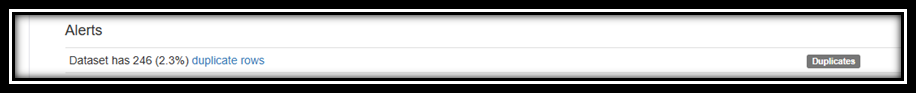

In [15]:
# Remover linhas duplicadas
df_encoded = df_encoded.drop_duplicates()

# Verificando duplicatas
duplicatas_restantes = df_encoded.duplicated()

# Calculando o número de duplicatas remanescentes, para certificar de que sumiram
num_duplicatas = duplicatas_restantes.sum()

print("O número de linhas duplicadas no dataset é:", num_duplicatas)

O número de linhas duplicadas no dataset é: 0


### Feature Selection

Além disso, foi apontado nos alertas, que a coluna que contém dados referentes a Campinas está desbalanceada. Irei desconsiderar os dados referentes a esta coluna. E por questão de interpretação dos dados e entender que não afetam a variável target (valor total), irei desconsiderar as colunas que se referem a aceitar animais/não aceitar animais.
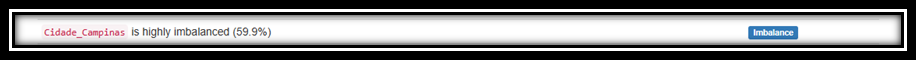

In [16]:
# Descartando as colunas listadas abaiaxo
df_encoded.drop(columns=['Cidade_Campinas','Aceita_animais?_acept','Aceita_animais?_not acept'], inplace=True)

<ipython-input-16-96cea87b8779>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_encoded.drop(columns=['Cidade_Campinas','Aceita_animais?_acept','Aceita_animais?_not acept'], inplace=True)


In [17]:
# Verificando se os Drops foram bem executados
df_encoded.head()

Área  Quartos  Banheiros  Estacionamento  Andar  Valor_condomínio  \
0   320        4          4               0     20              1200   
1    80        1          1               1      6              1000   
2    51        2          1               0      2               270   
3    25        1          1               0      1                 0   
4   376        3          3               7      0                 0   

   Valor_aluguel  IPTU  Seguro_incêndio  Valor_total  Cidade_Belo Horizonte  \
0           4960  1750               63         7973                      0   
1           2800     0               41         3841                      0   
2           1112    22               17         1421                      0   
3            800    25               11          836                      0   
4           8000   834              121         8955                      0   

   Cidade_Porto Alegre  Cidade_Rio de Janeiro  Cidade_São Paulo  \
0                    0                      0                 1   
1                    1                      0                 0   
2                    1                      0                 0   
3                    0                      0                 1   
4                    0                      0                 1   

   Mobiliado?_furnished  Mobiliado?_not furnished  
0                     0                         1  
1                     0                         1  
2                     0                         1  
3                     0                         1  
4                     0                         1

### Limpeza de dados

Percebe-se que existem dados com valores zerados, tais como: Estacionamento; Andar; Valor_condominio; IPTU. Há uma correlação que não é despresível de Valor_condominio, IPTU e Estacionameto com o valor_total (target),  com destaque para Estacionamento e IPTU.

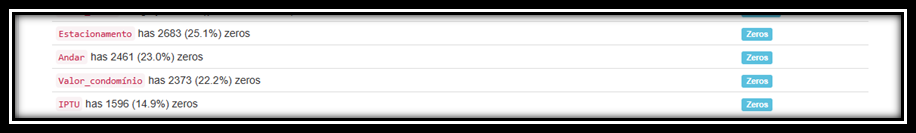

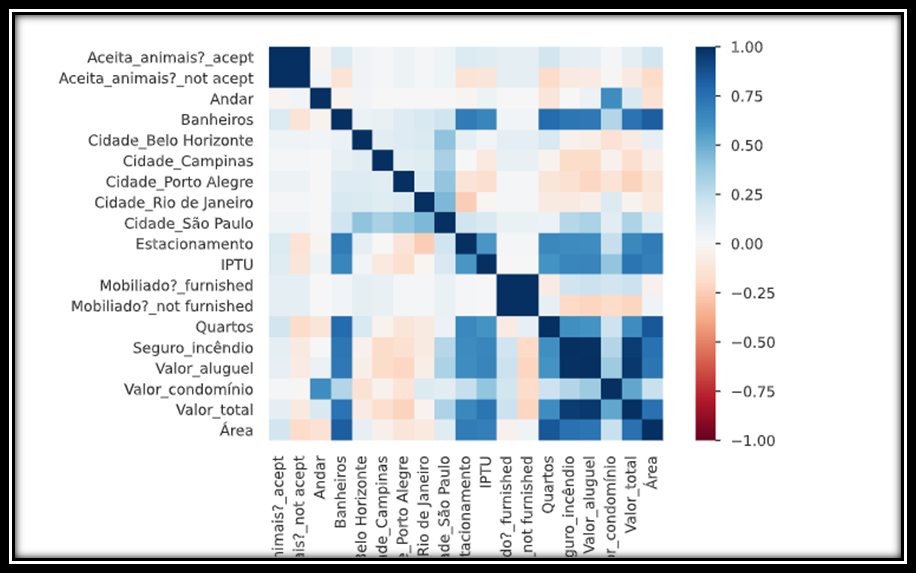

Para IPTU, entendo que de fato não faz sentido que existam valores zerados, portanto esses dados serão desconsiderados.

In [18]:
# Aplicando lógica para desconsiderar valores de IPTU que sejam iguais a 0.
df_sem_zero_iptu = df_encoded[df_encoded['IPTU'] != 0]

# Soma da quantidade de ocorrências de IPTU = 0
qtd_zeros_iptu = (df_sem_zero_iptu['IPTU'] == 0).sum()

# Verificando se ainda existem casos de IPTU = 0
print ("Número de valores igual a 0 na coluna IPTU:", qtd_zeros_iptu)

Número de valores igual a 0 na coluna IPTU: 0


Para condomínios, realmente pode ser que existam valores zerados, para propriedades particulares. Portanto, partirei da premissa de que valores zerados para condomínios com mais de 3 andares apenas, serão desconsiderados, pois passa a ser mais improvável que moradias com mais de 3 andares não façam parte de um condomínio.

In [19]:
# Criando condição para que as linhas que se apliquem ao critério sejam excluídas
condicoes_exclusao = (df_sem_zero_iptu['Valor_condomínio'] == 0) & (df_sem_zero_iptu['Andar'] > 3) # Definindo regra

df_sem_zero_iptu = df_sem_zero_iptu.drop(df_sem_zero_iptu[condicoes_exclusao].index)

condicoes_exclusao_drop = (df_sem_zero_iptu['Valor_condomínio'] == 0) & (df_sem_zero_iptu['Andar'] > 3)

# Verificar se ainda existem casos onde o valor do condomínio é zero e o número do andar é maior que 3
qtd_casos_exclusao = condicoes_exclusao_drop.sum()

if qtd_casos_exclusao == 0:
    print("Não existem mais casos onde o valor do condomínio é zero e o número do andar é maior que 3.")
else:
    print("Ainda existem", qtd_casos_exclusao, "casos onde o valor do condomínio é zero e o número do andar é maior que 3.")

Não existem mais casos onde o valor do condomínio é zero e o número do andar é maior que 3.


### Outliers
Chegando nesta etapa aqui, já havia feito um teste no modelo anteriormente e os resultados não foram satisfatórios. Por isso, resolvi verificar se existem outliers também que possam estar atrapalhando os resultados, já que não foi feita essa verificação antes do primeiro teste.

In [20]:
# Detecção de outliers usando z-score
from scipy import stats

# Cálculo do z-score para a coluna 'Valor_total'
z_scores_before = stats.zscore(df_sem_zero_iptu['Valor_total'])

# Definido um limiar para identificar outliers (z-score maior que 3 ou menor que -3)
threshold = 3

# Identificando índices de outliers
outlier_indices_before = np.where(np.abs(z_scores_before) > threshold)[0]

# Visualizando a quantidade de outliers detectados
print("Número de outliers detectados:", len(outlier_indices_before))

Número de outliers detectados: 6


Após confirmar que existem outliers, irei explorar melhor e visualizar graficamente.

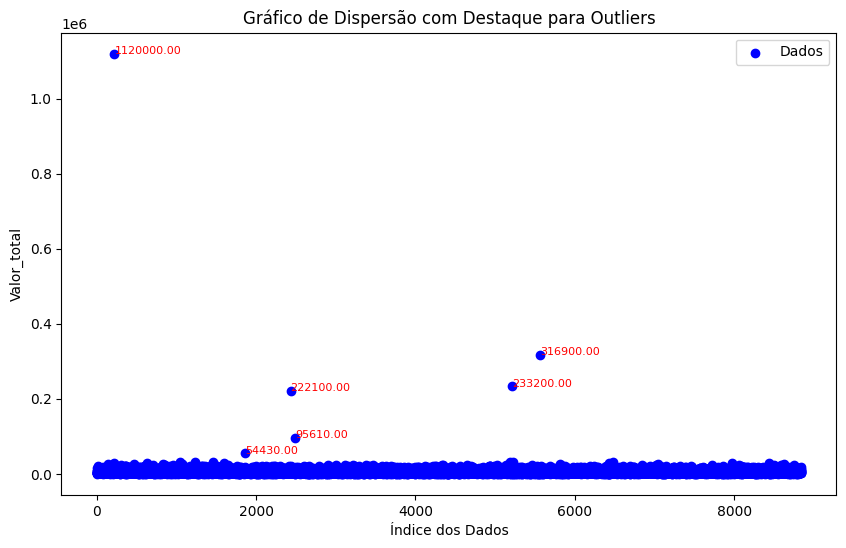

In [21]:
# Obtendo os índices dos outliers
outlier_indices_before = [index for index, score in enumerate(z_scores_before) if score > 3]

# Criando um gráfico de dispersão dos dados
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_sem_zero_iptu['Valor_total'])), df_sem_zero_iptu['Valor_total'], color='b', label='Dados')

# Destacando os outliers no gráfico com rótulos
for i in outlier_indices_before:
    plt.text(i, df_sem_zero_iptu['Valor_total'].iloc[i], f"{df_sem_zero_iptu['Valor_total'].iloc[i]:.2f}", fontsize=8, color='r')

# Adicionando legendas e rótulos ao gráfico
plt.title('Gráfico de Dispersão com Destaque para Outliers')
plt.xlabel('Índice dos Dados')
plt.ylabel('Valor_total')
plt.legend()

# Exibindo o gráfico
plt.show()


Neste momento, tive dificuldades para remover os Outliers usando o drop. Então optei por substituí-los pela média e obtive êxito.

In [22]:
# Substituindo outliers pela média da coluna
media_coluna = df_sem_zero_iptu['Valor_total'].mean()
df_sem_outliers = df_sem_zero_iptu.copy()
df_sem_outliers['Valor_total'].iloc[outlier_indices_before] = media_coluna

print("O valor da média que substituiu os outliers é:", media_coluna)

O valor da média que substituiu os outliers é: 5873.018774033024


Novamente irei verificar graficamente como está o comportamento do gráfico, após a substituição dos outliers anteriores pela média.

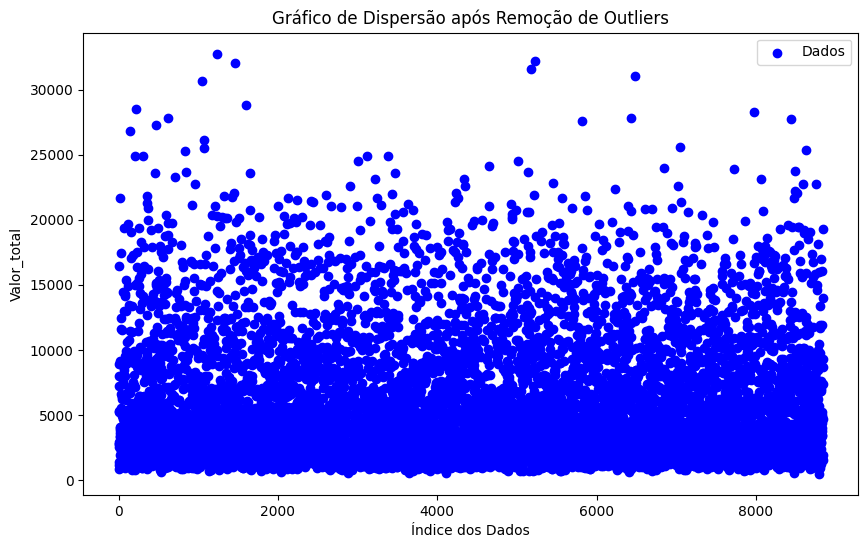

In [23]:
# Calculando o z-score novamente, após a remoção dos outliers
z_scores_after = stats.zscore(df_sem_outliers['Valor_total'])

# Identificando índices de outliers após a remoção
outlier_indices_after = np.where(np.abs(z_scores_after) > threshold)[0]

# Criando um gráfico de dispersão dos dados após a remoção dos outliers
plt.figure(figsize=(10, 6))
plt.scatter(range(len(df_sem_outliers['Valor_total'])), df_sem_outliers['Valor_total'], color='b', label='Dados')

# Adicionando legendas e rótulos
plt.title('Gráfico de Dispersão após Remoção de Outliers')
plt.xlabel('Índice dos Dados')
plt.ylabel('Valor_total')
plt.legend()

# Exibindo o gráfico
plt.show()

O comportamento do gráfico melhorou significativamente quando comparado com o anterior, apesar de ainda existirem valores que se destacam, não são tão fora da escala como antes.

Estarei farendo uma nova verificação da informação anterior do profile report, de que não existem valores nulos/missing no dataset.

In [24]:
# Definindo df_cleaned sendo igual ao df sem os outliers
df_cleaned = df_sem_outliers

# Confirmando informação de que não existem valores nulos
df_cleaned.isnull().sum()

Área                        0
Quartos                     0
Banheiros                   0
Estacionamento              0
Andar                       0
Valor_condomínio            0
Valor_aluguel               0
IPTU                        0
Seguro_incêndio             0
Valor_total                 0
Cidade_Belo Horizonte       0
Cidade_Porto Alegre         0
Cidade_Rio de Janeiro       0
Cidade_São Paulo            0
Mobiliado?_furnished        0
Mobiliado?_not furnished    0
dtype: int64

### Padronização
Irei realizar a padronização dos dados, para posteriormente verificar se há diferentça de resultados com o modelo sem a padronização aplicada. A minha variável alvo, é "Valor_total".

In [25]:
# Criando uma cópia do Df
df_padronizado = df_cleaned.copy()

# Criando um ojbeto
scaler = StandardScaler()

# Definição de colunas a padronizar
colunas_para_padronizar = [
    'Área',
    'Quartos',
    'Banheiros',
    'Estacionamento',
    'Andar',
    'Valor_condomínio',
    'Valor_aluguel',
    'IPTU',
    'Seguro_incêndio'
]

# Não foi incluído o valor_total por ser minha variável alvo

# Aplicando padronização às colunas especificadas
df_padronizado[colunas_para_padronizar] = scaler.fit_transform(df_padronizado[colunas_para_padronizar])

# Verificando o df padronizado
df_padronizado

Área  Quartos  Banheiros  Estacionamento  Andar  Valor_condomínio  \
0      0.27     1.17       1.13           -1.08   2.38              0.00   
2     -0.19    -0.55      -0.96           -1.08  -0.51             -0.07   
3     -0.24    -1.40      -0.96           -1.08  -0.67             -0.10   
4      0.36     0.31       0.43            3.21  -0.84             -0.10   
5     -0.16    -0.55      -0.96           -1.08   0.29             -0.04   
...     ...      ...        ...             ...    ...               ...   
10686 -0.17    -0.55      -0.96           -0.47  -0.03             -0.06   
10687  0.21     1.17       1.13            1.37   1.90              0.15   
10688 -0.16     0.31       0.43           -1.08   0.45             -0.02   
10689 -0.07    -0.55      -0.26            0.15   0.45              0.03   
10690 -0.14    -0.55      -0.96           -1.08  -0.84             -0.10   

       Valor_aluguel  IPTU  Seguro_incêndio  Valor_total  \
0               0.22  0.38             0.11     7,973.00   
2              -0.87 -0.12            -0.82     1,421.00   
3              -0.96 -0.12            -0.94       836.00   
4               1.08  0.12             1.29     8,955.00   
5              -0.65 -0.10            -0.66     2,750.00   
...              ...   ...              ...          ...   
10686          -0.77 -0.12            -0.72     1,926.00   
10687           3.07  0.16             2.70    19,260.00   
10688           0.51 -0.03             0.42     7,390.00   
10689           2.22 -0.05             1.97    14,020.00   
10690          -0.79 -0.08            -0.72     1,587.00   

       Cidade_Belo Horizonte  Cidade_Porto Alegre  Cidade_Rio de Janeiro  \
0                          0                    0                      0   
2                          0                    1                      0   
3                          0                    0                      0   
4                          0                    0                      0   
5                          0                    0                      1   
...                      ...                  ...                    ...   
10686                      0                    1                      0   
10687                      0                    0                      0   
10688                      0                    0                      1   
10689                      0                    0                      1   
10690                      0                    0                      0   

       Cidade_São Paulo  Mobiliado?_furnished  Mobiliado?_not furnished  
0                     1                     0                         1  
2                     0                     0                         1  
3                     1                     0                         1  
4                     1                     0                         1  
5                     0                     0                         1  
...                 ...                   ...                       ...  
10686                 0                     1                         0  
10687                 1                     0                         1  
10688                 0                     1                         0  
10689                 0                     1                         0  
10690                 1                     0                         1  

[8842 rows x 16 columns]

### Separação da base em treino e teste
A variável quero prever (y = Valor_total) e quais serão as colunas que serão utilizadas para a previsão (x).

In [26]:
# Drop na coluna target
y = df_padronizado.Valor_total
x = df_padronizado.drop('Valor_total', axis=1)

In [27]:
# Separação da nossa base nesse momento em treino e teste (80% treino e 20% teste)
from sklearn.model_selection import train_test_split
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y, test_size=0.2, random_state=42)

In [28]:
# Visualizando x_treino
x_treino

Área  Quartos  Banheiros  Estacionamento  Andar  Valor_condomínio  \
1580 -0.01     0.31       1.13            0.76  -0.19              0.07   
2893 -0.19    -0.55      -0.96           -0.47  -0.84             -0.05   
1346  0.07     1.17       2.53            1.37   0.45              0.22   
5241 -0.19    -0.55      -0.96           -0.47   1.58             -0.07   
559   0.16     2.02       0.43            0.76   1.09              0.07   
...    ...      ...        ...             ...    ...               ...   
6843  0.15     0.31       0.43            0.76  -0.19             -0.07   
6193 -0.04    -0.55      -0.96            0.76  -0.84             -0.10   
6443  0.18     0.31       1.13            0.76  -0.19              0.20   
1002  0.22     2.02       1.83            0.76  -0.19              0.19   
8714 -0.19    -0.55      -0.96           -0.47  -0.19             -0.08   

      Valor_aluguel  IPTU  Seguro_incêndio  Cidade_Belo Horizonte  \
1580          -0.48 -0.04            -0.51                      0   
2893          -0.88 -0.11            -0.88                      0   
1346           0.74  0.15             0.60                      0   
5241          -0.76 -0.12            -0.76                      0   
559           -0.05  0.01            -0.07                      1   
...             ...   ...              ...                    ...   
6843          -0.51 -0.06            -0.51                      1   
6193          -0.48 -0.07            -0.39                      0   
6443           0.94  0.30             0.78                      0   
1002           0.40 -0.11             0.50                      0   
8714          -0.76 -0.12            -0.76                      0   

      Cidade_Porto Alegre  Cidade_Rio de Janeiro  Cidade_São Paulo  \
1580                    0                      0                 1   
2893                    0                      0                 1   
1346                    0                      0                 1   
5241                    0                      0                 1   
559                     0                      0                 0   
...                   ...                    ...               ...   
6843                    0                      0                 0   
6193                    0                      0                 1   
6443                    0                      0                 1   
1002                    1                      0                 0   
8714                    0                      0                 0   

      Mobiliado?_furnished  Mobiliado?_not furnished  
1580                     0                         1  
2893                     0                         1  
1346                     1                         0  
5241                     0                         1  
559                      0                         1  
...                    ...                       ...  
6843                     0                         1  
6193                     0                         1  
6443                     1                         0  
1002                     0                         1  
8714                     0                         1  

[7073 rows x 15 columns]

In [29]:
# Visuaizando y_treino
y_treino

1580    4,917.00
2893    1,674.00
1346   11,730.00
5241    1,862.00
559     6,541.00
          ...   
6843    3,009.00
6193    2,732.00
6443   12,770.00
1002    9,231.00
8714    1,805.00
Name: Valor_total, Length: 7073, dtype: float64

Confirmação de que foi feito com sucesso a separação da base em treino e teste.

In [30]:
# Verificando o tamanho dos conjuntos de treino, teste e tratado
print("Tamanho do conjunto de treino:", x_treino.shape)
print("Tamanho do conjunto de teste:", x_teste.shape)
print("Tamanho do conjunto de tratado:", df_cleaned.shape)

Tamanho do conjunto de treino: (7073, 15)
Tamanho do conjunto de teste: (1769, 15)
Tamanho do conjunto de tratado: (8842, 16)


# Modelagem e treinamento
Nesta etapa, serão importados os modelos a serem utilizados. O objetivo é a construção de modelos para resolver o problema definido.

### Seleção e avaliação de algorítimos

Linear Regression: MSE 23751038.32 (65938005.44) - RMSE 4873.50
Ridge: MSE 23611538.14 (65544237.90) - RMSE 4859.17
Lasso: MSE 23553249.78 (65411392.63) - RMSE 4853.17
KNN: MSE 1513871.10 (456415.17) - RMSE 1230.39
CART: MSE 466728.36 (405003.93) - RMSE 683.18
SVM: MSE 19126461.62 (1869566.83) - RMSE 4373.38


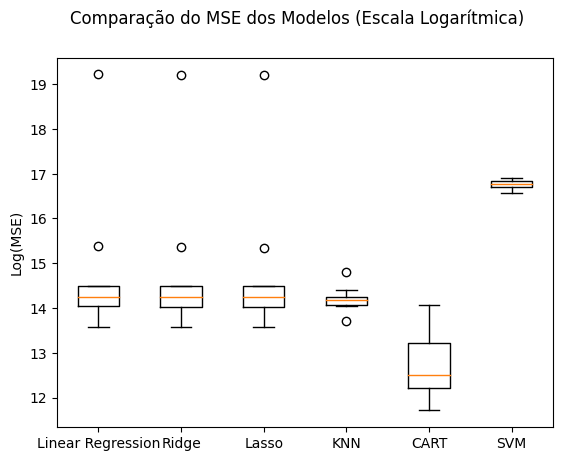

In [31]:
# Criando os folds para a validação cruzada
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)

# Lista de modelos a serem avaliados
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('Lasso', Lasso()),
    ('KNN', KNeighborsRegressor()),
    ('CART', DecisionTreeRegressor()),
    ('SVM', SVR())
]

# Avaliando um modelo por vez
results = []
names = []
for name, model in models:
    # Ajustando o modelo e calculando a validação cruzada
    cv_results = cross_val_score(model, x_treino, y_treino, cv=kfold, scoring='neg_mean_squared_error')
    results.append(cv_results)
    names.append(name)
    # Imprimindo os resultados da validação cruzada
    msg = "%s: MSE %0.2f (%0.2f) - RMSE %0.2f" % (name, abs(cv_results.mean()), cv_results.std(), np.sqrt(abs(cv_results.mean())))
    print(msg)

# Ajuste de escala logarítmica nos resultados do MSE
results_log = [np.log(-result) for result in results]

# Boxplot de comparação dos modelos com escala logarítmica
fig = plt.figure()
fig.suptitle('Comparação do MSE dos Modelos (Escala Logarítmica)')
ax = fig.add_subplot(111)
plt.boxplot(results_log)
ax.set_xticklabels(names)
plt.ylabel('Log(MSE)')
plt.show()

Irei imprimir o R² de cada modelo para avaliar a qualidade das previsões de cada.

In [32]:
# Para cada modelo na lista de modelos
for name, model in models:
    # Realizando o ajuste do modelo aos dados de treinamento
    model.fit(x_treino, y_treino)

    # Fazendo previsões nos dados de teste
    y_pred = model.predict(x_teste)

    # Calculando o R^2
    r2 = r2_score(y_teste, y_pred)

    # Imprimindo o nome do modelo e seu R²
    print(f"{name}: R² =", r2)

Linear Regression: R^2 = 0.9021661539708346
Ridge: R^2 = 0.9021792108368587
Lasso: R^2 = 0.9021230838399987
KNN: R^2 = 0.9407128936118156
CART: R^2 = 0.9803820658322918
SVM: R^2 = 0.13373930072503748


O coeficiente de determinação (R²) é uma métrica comumente usada para medir a qualidade das previsões do modelo.

Inicialmente, aplicamos a validação cruzada (cross-validation) para avaliar a capacidade de generalização do modelo em diferentes partições do conjunto de treinamento. Entretanto, ao calcular o R² em cada fold da validação cruzada, observamos que o resultado médio foi negativo. Isso sugere que o modelo não se ajusta adequadamente aos dados e não generaliza bem para novos dados.

Por outro lado, ao calcular o R² no conjunto de teste, obtive um valor positivo, indicando que o modelo possui boa capacidade de explicar a variabilidade dos dados.

Dessa forma, considerando que a validação cruzada resultou em um desempenho insatisfatório e que o R² no conjunto de teste fornece uma medida confiável da capacidade preditiva do modelo, optei por utilizar apresentar apenas o R² calculado, como métrica de avaliação do modelo de regressão linear.

Buscando confirmar as informações anteriores, irei plotar gráficos comparativos para melhor visualização dos Valores Reais vs Previsões, Erros de Previsão (Frequência e Densidade) de cada modelo.

<ipython-input-33-f847597d952e>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, color='blue', shade=True, ax=ax[2])
<ipython-input-33-f847597d952e>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, color='blue', shade=True, ax=ax[2])
<ipython-input-33-f847597d952e>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, color='blue', shade=True, ax=ax[2])
<ipython-input-33-f847597d952e>:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuos, color='blue', shade=True, ax

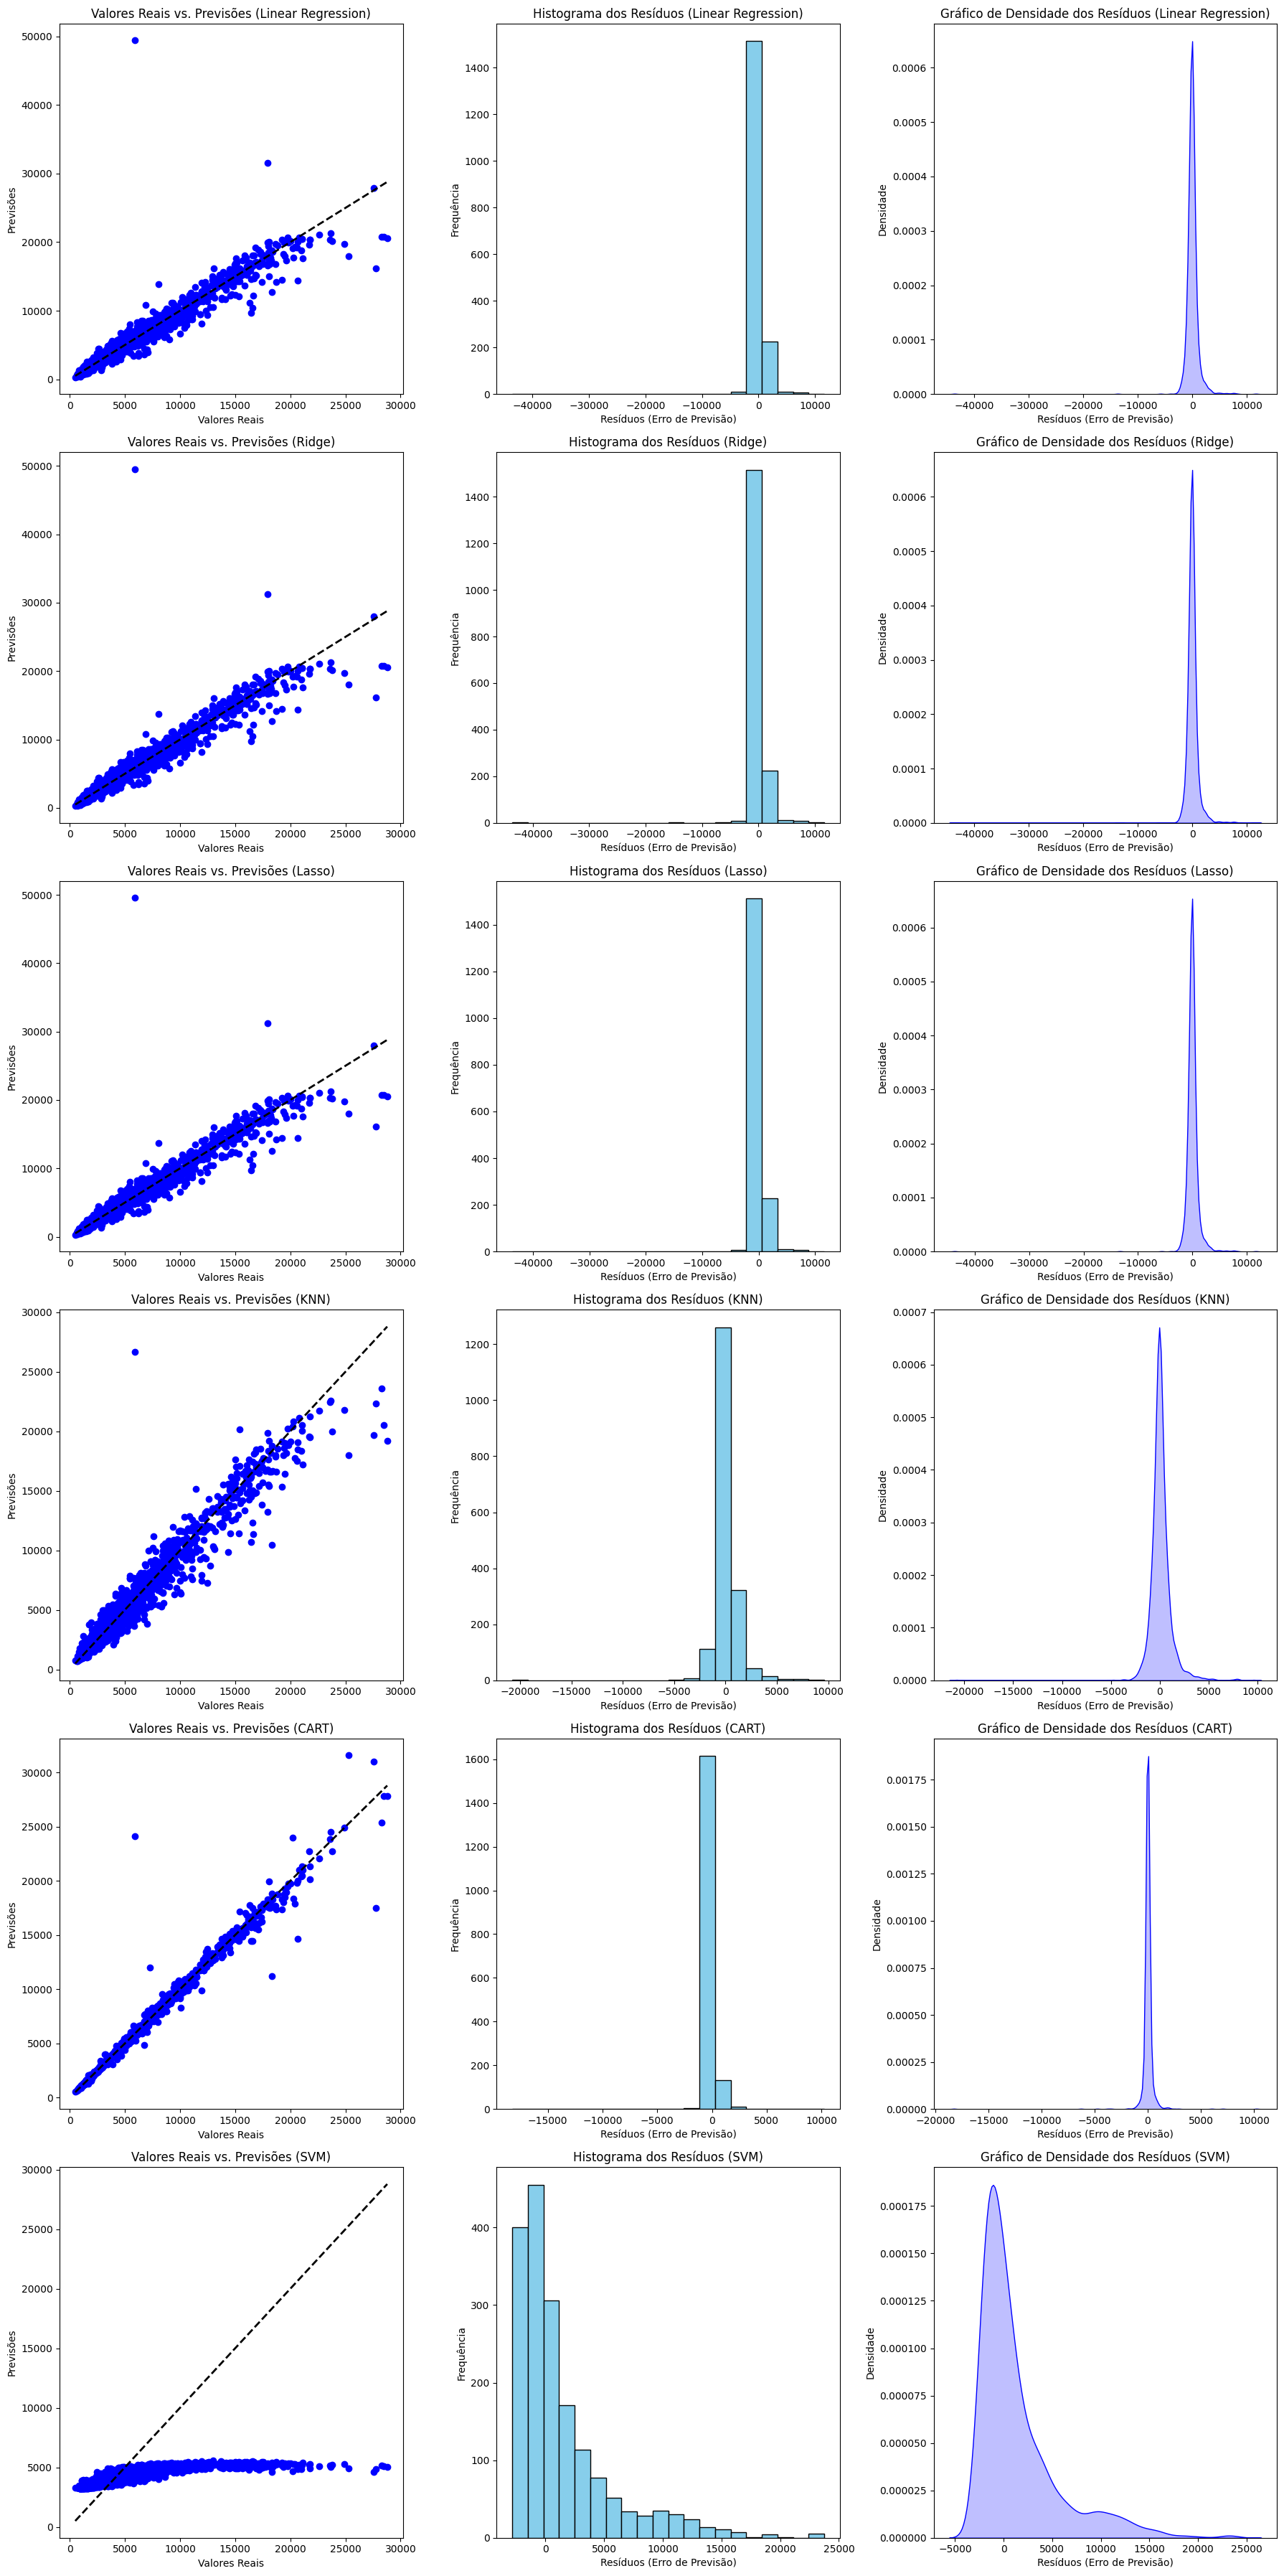

In [33]:
def plot_regression_results_side_by_side(model_name, y_test, y_pred, ax):
    # Gráfico de Dispersão entre Valores Reais e Previsões
    ax[0].scatter(y_test, y_pred, color='blue')
    ax[0].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--k', lw=2)
    ax[0].set_xlabel('Valores Reais')
    ax[0].set_ylabel('Previsões')
    ax[0].set_title(f'Valores Reais vs. Previsões ({model_name})')

    # Histograma dos Resíduos
    residuos = y_test - y_pred
    ax[1].hist(residuos, bins=20, color='skyblue', edgecolor='black')
    ax[1].set_xlabel('Resíduos (Erro de Previsão)')
    ax[1].set_ylabel('Frequência')
    ax[1].set_title(f'Histograma dos Resíduos ({model_name})')

    # Gráfico de Densidade dos Resíduos
    sns.kdeplot(residuos, color='blue', shade=True, ax=ax[2])
    ax[2].set_xlabel('Resíduos (Erro de Previsão)')
    ax[2].set_ylabel('Densidade')
    ax[2].set_title(f'Gráfico de Densidade dos Resíduos ({model_name})')

# Criando uma figura com subplots lado a lado para cada modelo
fig, axes = plt.subplots(len(models), 3, figsize=(18, len(models) * 6))

# Chamando a função plot_regression_results_side_by_side para cada modelo
for i, (name, model) in enumerate(models):
    ax = axes[i]

    # Ajustando o modelo aos dados de treinamento
    model.fit(x_treino, y_treino)

    # Previsões nos dados de teste
    y_pred = model.predict(x_teste)

    # Chamando a função plot_regression_results_side_by_side para este modelo
    plot_regression_results_side_by_side(name, y_teste, y_pred, ax)

# Ajustando o layout para evitar sobreposição de rótulos
plt.tight_layout()
plt.show()


Conforme esperado, o comportamento gráfico compartivo dos valores reais vs previstos, teve o melhor resultado esperado para o modelo CART.

**Métricas de Erro (MSE e RMSE):**
As métricas MSE e RMSE para regressão linear, Ridge e Lasso são consideravelmente mais altas em comparação com os outros modelos, indicando uma maior discrepância entre os valores reais e as previsões. Isso sugere que esses modelos podem estar tendo dificuldades para se ajustar aos dados e estão gerando previsões imprecisas.


**Coeficiente de Determinação (R²):**
Embora o R² para regressão linear, Ridge e Lasso seja relativamente alto (em torno de 0.90), eles são menores em comparação com os outros modelos. Isso indica que esses modelos podem não estar capturando toda a variação nos dados e podem estar subestimando a complexidade do relacionamento entre as variáveis independentes e dependentes.
Considerando esses pontos, é possível que os modelos de regressão linear, Ridge e Lasso estejam sofrendo de **underfitting.**

### Ensembles

In [34]:
# Definindo os modelos individuais
modelos = [
    ('CART', DecisionTreeRegressor()),
    ('KNN', KNeighborsRegressor()),
    ('Lasso', Lasso()),
    ('Linear Regression', LinearRegression()),
    ('Ridge', Ridge()),
    ('SVM', SVR())
]

# Criando o modelo de ensemble
ensemble = VotingRegressor(estimators=modelos)

# Ajustando o modelo aos dados de treinamento
ensemble.fit(x_treino, y_treino)

# Fazendo previsões nos dados de teste
y_pred_ensemble = ensemble.predict(x_teste)

# Calculando o R^2
r2_ensemble = r2_score(y_teste, y_pred_ensemble)

# Imprimindo o R^2 do ensemble
print("R² do Ensemble:", r2_ensemble)

R^2 do Ensemble: 0.92084739373816


### Ajuste de hiperparâmetros
Irei verificar se há algum ajuste de hiperpâmetros que melhore o desempenho dos modelos, inclusive dos que talvez estejam sofrendo underfitting.

#### Decision Tree (CART)

In [35]:
# Definição de parâmetros para ajustar e os valores a serem testados
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Instanciando o modelo
modelo_cart = DecisionTreeRegressor()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(modelo_cart, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibindo o melhor score R^2
print("Melhor R²:", grid_search.best_score_)

Melhores hiperparâmetros: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}
Melhor R^2: 0.9793599259860102


Anteriormente, foi verificado que o R² antes do ajuste de hiperparâmetros era:

 **CART: R² = 0.9809885679885098**


Após o ajuste de hiperparâmetros, o resultado foi:


**Melhor R²: 0.9796061814650823**

O R² anterior ao ajuste e o R² obtido após os hiperparâmetros estão bem próximos, o que sugere que o modelo CART já estava bem ajustado aos dados de treinamento mesmo antes da busca em grade.

Mesmo que o R² anterior já fosse alto, a busca em grade pode ajudar a encontrar uma combinação de hiperparâmetros que melhore ainda mais o desempenho do modelo, mesmo que marginalmente. No entanto, é importante considerar se essa melhoria é significativa o suficiente para justificar o esforço computacional e o tempo necessários para realizar a busca em grade.

Dado que a diferença entre os dois valores de R² é pequena e que o valor obtido após a busca em grade ainda é muito alto, é possível que o modelo já esteja bem ajustado e que ajustar ainda mais os hiperparâmetros não leve a melhorias substanciais no desempenho do modelo.

Regressão Linear (LR): MSE 23751038.32 (RMSE 4873.50)
A regressão linear apresentou um MSE de 23751038.32 e um RMSE de 4873.50, o que indica que, em média, as previsões do modelo estão a uma distância de aproximadamente 4873.50 unidades do valor real.


Ridge Regression: MSE 23611538.14 (RMSE 4859.17)
A regressão Ridge obteve um MSE ligeiramente menor que a regressão linear, indicando uma pequena melhoria no desempenho. O RMSE também diminuiu ligeiramente em relação à regressão linear.


Lasso Regression: MSE 23553249.78 (RMSE 4853.17)
A regressão Lasso teve um desempenho semelhante à regressão Ridge, com um MSE um pouco menor e um RMSE levemente reduzido.


K-Nearest Neighbors (KNN): MSE 1513871.10 (RMSE 1230.39)
O KNN apresentou um MSE significativamente menor em comparação com os modelos lineares, indicando um desempenho superior na previsão dos valores. O RMSE também é substancialmente menor, sugerindo previsões mais precisas.


Decision Tree (CART): MSE 466971.76 (RMSE 683.35)
O modelo de árvore de decisão obteve o menor MSE entre os modelos avaliados, indicando um desempenho superior na previsão dos valores. O RMSE também é o menor, o que sugere que as previsões são mais precisas em comparação com os outros modelos.


Support Vector Machine (SVM): MSE 19126461.62 (RMSE 4373.38)
O SVM apresentou um MSE significativamente maior em comparação com os modelos lineares e a árvore de decisão, indicando um desempenho inferior na previsão dos valores. O RMSE também é maior, sugerindo previsões menos precisas.

#### K-Nearest Neighbors (KNN)


In [36]:
# Definindo parâmetros para ajustar e os valores a serem testados
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance']
}

# Instanciando o modelo
modelo_knn = KNeighborsRegressor()

# Criando o objeto GridSearchCV
grid_search_knn = GridSearchCV(modelo_knn, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search_knn.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros KNN:", grid_search_knn.best_params_)

# Exibindo o melhor escore R^2
print("Melhor R² KNN:", grid_search_knn.best_score_)

Melhores hiperparâmetros KNN: {'n_neighbors': 7, 'weights': 'distance'}
Melhor R^2 KNN: 0.933561525218583


Anteriormente, foi verificado que o R² antes do ajuste de hiperparâmetros era:

 **KNN: R² = 0.9809885679885098**


Após o ajuste de hiperparâmetros, o resultado foi:


**Melhor R² KNN: 0.933561525218583**


Assim como o a árvore de decisã (CART), o R^2 anterior ao ajuste e o R^2 obtido após os hiperparâmetros estão bem próximos, o que sugere que o modelo CART já estava bem ajustado aos dados de treinamento mesmo antes da busca em grade.

Mesmo que o R^2 anterior já fosse alto, a busca em grade pode ajudar a encontrar uma combinação de hiperparâmetros que melhore ainda mais o desempenho do modelo, mesmo que marginalmente. No entanto, é importante considerar se essa melhoria é significativa o suficiente para justificar o esforço computacional e o tempo necessários para realizar a busca em grade.

Dado que a diferença entre os dois valores de R^2 é pequena e que o valor obtido após a busca em grade ainda é muito alto, é possível que o modelo já esteja bem ajustado e que ajustar ainda mais os hiperparâmetros não leve a melhorias substanciais no desempenho do modelo.






#### Lasso Regression

In [37]:
# Definindo parâmetros para ajustar e os valores a serem testados
param_grid = {
    'alpha': [0.1, 0.5, 1.0]
}

# Instanciando o modelo
modelo_lasso = Lasso()

# Criando o objeto GridSearchCV
grid_search_lasso = GridSearchCV(modelo_lasso, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search_lasso.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros Lasso:", grid_search_lasso.best_params_)

# Exibindo o melhor escore R^2
print("Melhor R² Lasso:", grid_search_lasso.best_score_)

Melhores hiperparâmetros Lasso: {'alpha': 1.0}
Melhor R^2 Lasso: -0.20373182850505228


#### Regressão Linear (LR)

In [38]:
# Definindo parâmetros para ajustar e os valores a serem testados
param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

# Instanciando o modelo
modelo_regressao = LinearRegression()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(modelo_regressao, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exibindo o melhor escore R^2
print("Melhor R²:", grid_search.best_score_)

Melhores hiperparâmetros: {'copy_X': True, 'fit_intercept': False}
Melhor R^2: -0.2147185072003012


#### Ridge Regression

In [39]:
# Definição de parâmetros para ajustar e os valores a serem testados
param_grid = {
    'alpha': [0.1, 1, 10],
    'fit_intercept': [True, False],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Instanciando o modelo
modelo_ridge = Ridge()

# Criando o objeto GridSearchCV
grid_search = GridSearchCV(modelo_ridge, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search.best_params_)

# Exiba o melhor escore R^2
print("Melhor R²:", grid_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Melhores hiperparâmetros: {'alpha': 10, 'fit_intercept': False, 'solver': 'auto'}
Melhor R^2: -0.10154354619626486


In [40]:
# Definição de parâmetros para ajustar e os valores a serem testados
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto']
}

# Instanciando o modelo
modelo_svm = SVR()

# Criando o objeto GridSearchCV
grid_search_svm = GridSearchCV(modelo_svm, param_grid, cv=5, scoring='r2')

# Realizando a busca em grade nos dados de treino
grid_search_svm.fit(x_treino, y_treino)

# Exibindo os melhores hiperparâmetros encontrados
print("Melhores hiperparâmetros:", grid_search_svm.best_params_)

# Exibindo o melhor escore R^2
print("Melhor R²:", grid_search_svm.best_score_)

Melhores hiperparâmetros: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Melhor R^2: 0.8644522333107668


#### Support Vector Machine (SVM)

### Método Avançados

Por ter atingido até então resultados consideravelmente bons para os modelos, com as métricas já utilizadas e pelo fato de métodos mais avançados exigirem mais poder computacional e recursos (memória e tempo de processamento), podendo ser um processo mais demorado, optei por não utiliza-los neste primeiro momento.No entanto, estarei com a mente aberta a explorar métodos mais avançados no futuro, à medida que as necessidades do projetoe evoluam ou para futuros.

# Avaliação de resultados

#### Selação e avaliação de algorítimos

**MSE/RMSE**


K-Nearest Neighbors (KNN): O KNN apresentou um MSE significativamente menor em comparação com os modelos lineares, indicando um desempenho superior na previsão dos valores. O RMSE também é substancialmente menor, sugerindo previsões mais exatas.

Decision Tree (CART): MSE 466971.76 (RMSE 683.35) O modelo de árvore de decisão obteve o menor MSE entre os modelos avaliados, indicando um desempenho superior na previsão dos valores. O RMSE também é o menor, o que sugere que as previsões são mais exatas em comparação com os outros modelos.

Além disso, ao imprimir o R² dos modelos para avaliar a qualidade destes, foi confirmadas com a verificação do R² que o desempenho deles, de fato, é bem superior aos demais, com destaque para o CART (sendo o maior).


O comportamento no gráfico dos valores Previstos vs valores Reais, demonstra claramente a qualidade do modelo CART quando comparado com os demais, mostrando que faz total sentido os resultados.

#### Ensembles

O resultado R² do ensemble por Votting, representa o desempenho geral, que é uma combinação dos resultados dos modelos individuais. Um valor de R² próximo a 1 indica que o ensemble está fazendo previsões muito precisas, capturando a maior parte da variação nos dados de teste.

Neste caso específico, o R² do ensemble foi calculado como 0.9204249345362483, o que sugere que o ensemble está produzindo previsões muito boas, superando alguns dos modelos individuais que foram combinados para formá-lo. O ensemble apenas não superou os modelos que realmente já haviam se destacado anteriormente, com um desempenho muito bom (**CART e KNN**).

Lembrando que os valores do R² encontrados inicialmente foram:

Linear Regression: R² = 0.9021661539708346


Ridge: R² = 0.9021792108368587


Lasso: R² = 0.9021230838399987


KNN: R² = 0.9407128936118156


CART: R² = 0.9809885679885098


SVM: R² = 0.13373930072503748



#### Hiperparâmetros

O destaque do ajuste de hiperparâmetros ficou por conta do **Support Vector Machine (SVM)** que teve uma melhora significativa do desempenho após o ajuste de hiperparâmetros. Esse valor, conseguiu inclusive superar o referente ao **KNN**, ficando abaixo apenas do **CART**. Conforme dados abaixo:

Anterior ao ajuste de hiperparâmetros -> R² = 0.13373930072503748

Após o ajuste de hiperparâmetros -> Melhor R²: 0.9796061814650823



Especificamente para os modelos que haviam se destacado (**CART** e **KNN**), foi verificado que o R² antes do ajuste de hiperparâmetros são bem próximos do resultado após o ajuste. Sendo eles:

**CART**

Anterior ao ajuste de hiperparâmetros -> R² = 0.9809885679885098

Após o ajuste de hiperparâmetros -> Melhor R²: 0.9796061814650823

**KNN**

Anterior ao ajuste de hiperparâmetros -> R² = 0.9407128936118156

Após o ajuste de hiperparâmetros -> Melhor R²: 0.933561525218583


O R² anterior ao ajuste e o R² obtido após os hiperparâmetros estão bem próximos, o que sugere que tanto o modelo **CART** quanto **KNN** já estavam bem ajustados aos dados de treinamento.

Mesmo que o R² anterior já fosse alto, a busca em grade pode ajudar a encontrar uma combinação de hiperparâmetros que melhore ainda mais o desempenho do modelo. No entanto, é importante considerar se essa melhoria é significativa o suficiente para justificar o esforço computacional.

Dado que a diferença entre os dois valores de R² é pequena e que o valor obtido após a busca ainda é muito alto, é possível que o modelo já esteja bem ajustado e que ajustar ainda mais os hiperparâmetros não leve a melhorias substanciais no desempenho do modelo.

Para os demais modelos (**Lasso, Ridge, LR**) o ajuste de hiperparâmetros não resultou em melhoria. Para estes, obtivemos inclusive um R² negativo.

### Treinamento com o modelo escolhido
O modelo escolhido para treinamento, tendo em vista seu desempenho nas atividades anteriores e as justificativas já apresentadas anteriormente, é o **Decision Tree (CART)**.

In [41]:
# Selecionando o que entendo ser o melhor modelo
best_model = DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)
best_model.fit(x_treino, y_treino)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=2)

In [42]:
# Imprimindo o r² no conjunto de teste com o modelo de Decision Tree (CART)
y_pred = best_model.predict(x_teste)
r2 = r2_score(y_teste, y_pred)
print("R² do modelo no conjunto de teste:", r2)

R^2 do modelo no conjunto de teste: 0.9771627113749644


Abaixo serão apresentadas outras métricas.

In [43]:
# Fazendo previsões no conjunto de teste
y_pred = best_model.predict(x_teste)

# Calculando o Erro Médio Absoluto (MAE)
mae = mean_absolute_error(y_teste, y_pred)

# Calculando o Erro Quadrático Médio (MSE)
mse = mean_squared_error(y_teste, y_pred)

# Calculando a Raiz do Erro Quadrático Médio (RMSE)
rmse = np.sqrt(mse)

# Calculando o Erro Percentual Absoluto Médio (MAPE)
mape = np.mean(np.abs((y_teste - y_pred) / y_teste)) * 100

# Calculando o Erro Percentual Médio (MPE)
mpe = np.mean((y_teste - y_pred) / y_teste) * 100

# Imprimindo as métricas
print("Erro Médio Absoluto (MAE):", mae)
print("Erro Quadrático Médio (MSE):", mse)
print("Raiz do Erro Quadrático Médio (RMSE):", rmse)
print("Erro Percentual Absoluto Médio (MAPE):", mape)
print("Erro Percentual Médio (MPE):", mpe)

Erro Médio Absoluto (MAE): 220.12351137110372
Erro Quadrático Médio (MSE): 498188.3848263364
Raiz do Erro Quadrático Médio (RMSE): 705.824613361093
Erro Percentual Absoluto Médio (MAPE): 4.22562467337062
Erro Percentual Médio (MPE): -0.41250962465504326


### Curva de aprendizado

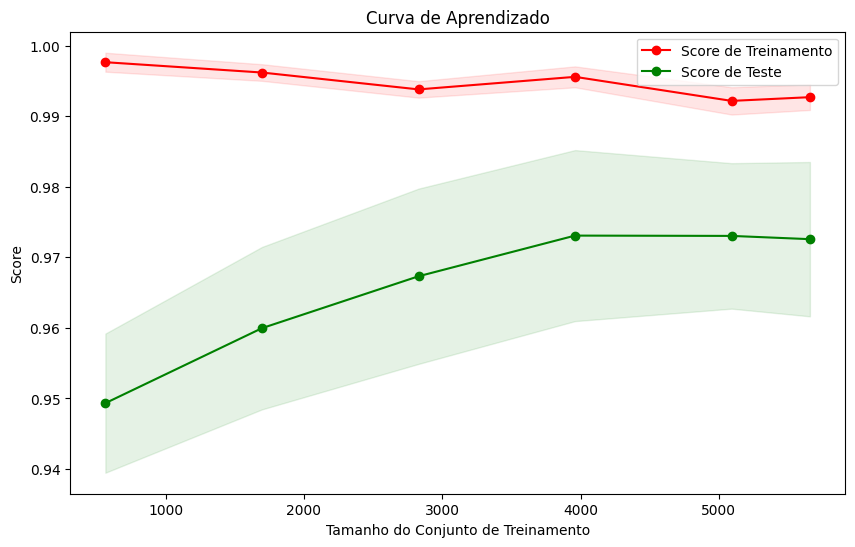

In [46]:
# Definindo o tamanho dos conjuntos de treinamento
train_sizes = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]

# Calculando os scores de treinamento e teste usando a curva de aprendizado
train_sizes, train_scores, test_scores = learning_curve(
    estimator=best_model,  # Seu modelo final aqui
    X=x_treino,
    y=y_treino,
    train_sizes=train_sizes,
    cv=5  # Definindo folds
)

# Calculando as médias e desvios padrão dos scores de treinamento e teste
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plotando a curva de aprendizado
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Score de Treinamento")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Score de Teste")
plt.xlabel("Tamanho do Conjunto de Treinamento")
plt.ylabel("Score")
plt.title("Curva de Aprendizado")
plt.legend(loc="best")
plt.show()

Analisando o gráfico acima, é possível perceber que os valores de treinamento e teste convergem para um valor próximo, indicando que há uma similaridade de desempenho entre conforme o tamanho do conjunto de dados aumenta, sugerindo que não há overfitting.